# 1- import and explore data

In [18]:
import pandas as pd
data=pd.read_csv("Mall_Customers.csv")

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [19]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
data.shape

(200, 5)

In [21]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [28]:
def missing_values(df):
    missing_data = df.isnull()
    for column in missing_data.columns.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")
missing_values(data)

CustomerID
False    200
Name: CustomerID, dtype: int64

Gender
False    200
Name: Gender, dtype: int64

Age
False    200
Name: Age, dtype: int64

Annual Income (k$)
False    200
Name: Annual Income (k$), dtype: int64

Spending Score (1-100)
False    200
Name: Spending Score (1-100), dtype: int64



# Encodage

In [29]:
datacopy=data.copy()

In [39]:
from sklearn.preprocessing import  OneHotEncoder
df_encode = datacopy[["Gender"]]
encode = OneHotEncoder()
encode.fit(df_encode)
df_encode =pd.DataFrame(encode.transform(df_encode).toarray(), columns = ["female", "male"])

df_encode

,female,male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,1.0,0.0
197,0.0,1.0
198,0.0,1.0


In [42]:
df_scale = datacopy[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
datacopy = df_encode.join(df_scale)
datacopy.head()

,female,male,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.0,19,15,39
1,0.0,1.0,21,15,81
2,1.0,0.0,20,16,6
3,1.0,0.0,23,16,77
4,1.0,0.0,31,17,40


# Kmean Model 

In [54]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=4, init='k-means++',random_state=30)
lab=kmean.fit_predict(datacopy)
lab

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [55]:
kmean.cluster_centers_

array([[ 0.5       ,  0.5       , 24.82142857, 28.71428571, 74.25      ],
       [ 0.62105263,  0.37894737, 44.89473684, 48.70526316, 42.63157895],
       [ 0.47368421,  0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.53846154,  0.46153846, 32.69230769, 86.53846154, 82.12820513]])

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

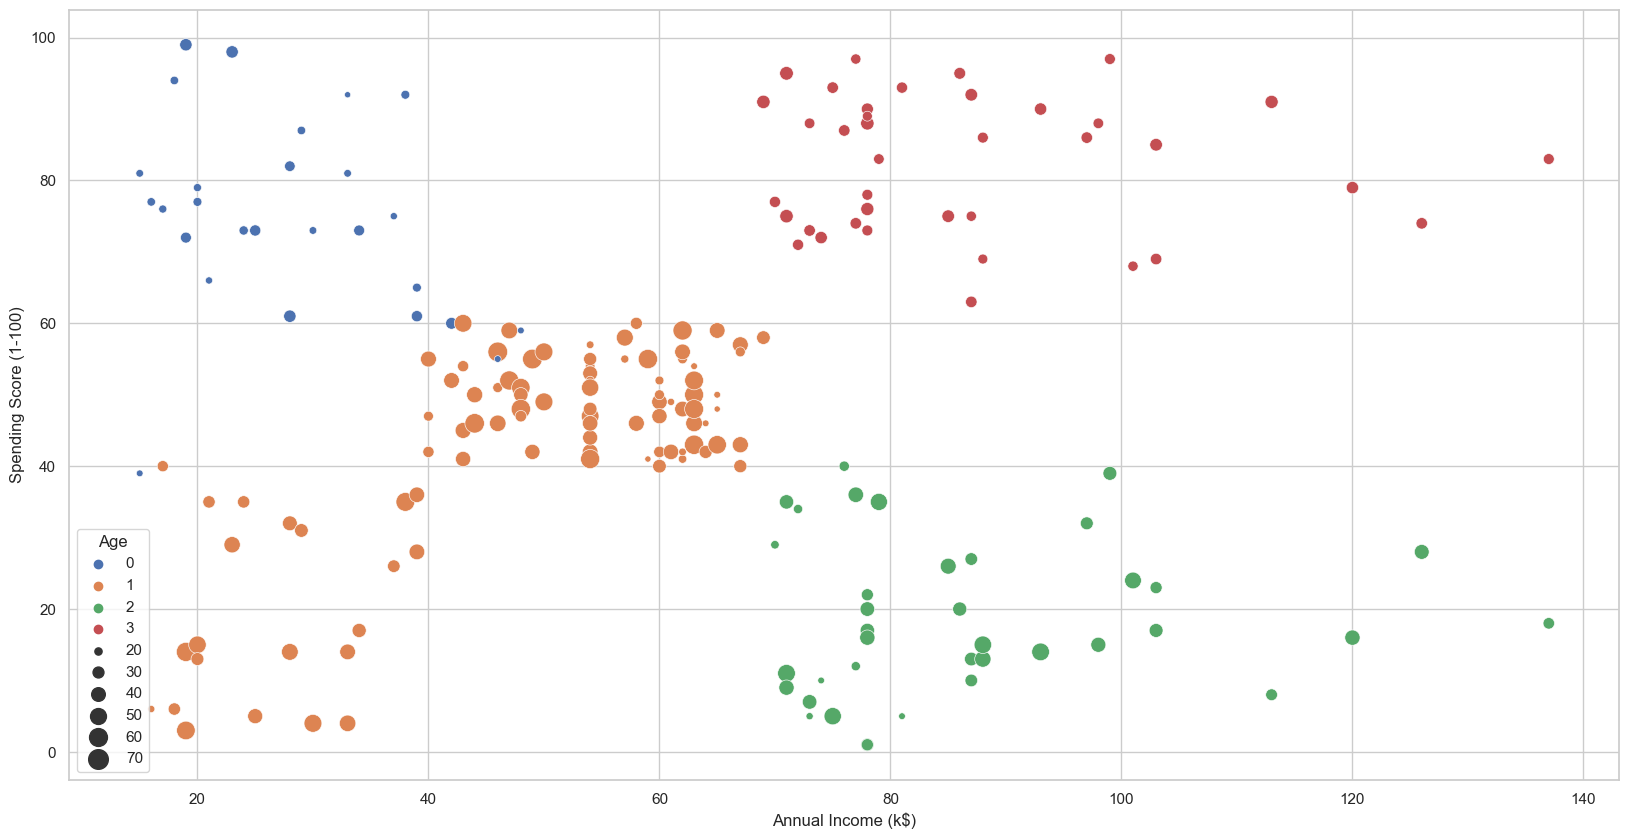

In [62]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = datacopy ,x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = lab, palette = "deep", size = "Age",
               sizes=(20, 200))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 700x700 with 0 Axes>